In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x = df.drop(columns=['Exited', 'RowNumber','Surname','CustomerId'])
y = df['Exited']

In [5]:
df = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
x = pd.get_dummies(x, columns=['Geography', 'Gender'], drop_first=True)

In [8]:
x.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [9]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [10]:

import tensorflow as tf
from tensorflow import keras

In [11]:
model = keras.Sequential([
    keras.layers.Dense(64, activation ='relu', input_shape=(x.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Train the model

In [14]:

model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

Epoch 1/40


250/250 [==============================] - 1s 3ms/step - loss: 0.4844 - accuracy: 0.7918
Epoch 2/40
250/250 [==============================] - 1s 2ms/step - loss: 0.4431 - accuracy: 0.8059
Epoch 3/40
250/250 [==============================] - 1s 4ms/step - loss: 0.4224 - accuracy: 0.8181
Epoch 4/40
250/250 [==============================] - 1s 5ms/step - loss: 0.3983 - accuracy: 0.8331
Epoch 5/40
250/250 [==============================] - 1s 5ms/step - loss: 0.3776 - accuracy: 0.8405
Epoch 6/40
250/250 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8508
Epoch 7/40
250/250 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8536
Epoch 8/40
250/250 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8547
Epoch 9/40
250/250 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8556
Epoch 10/40
250/250 [==============================] - 1s 3ms/step - loss: 0.3479 - accuracy: 0.85

In [17]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) 

63/63 [==============================] - 0s 2ms/step


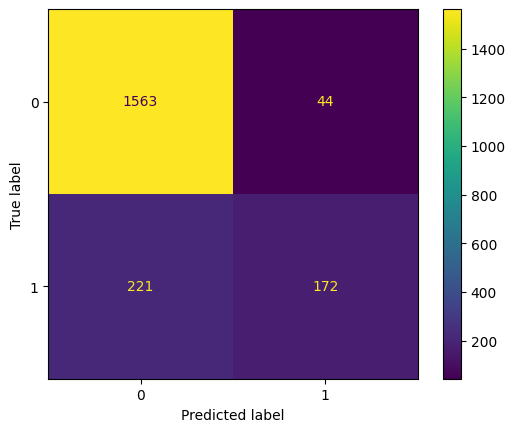

Accuracy: 0.8675
Confusion Matrix:
[[1563   44]
 [ 221  172]]


In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()
plt.show()

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)